In [1]:
import matplotlib.pyplot as plt
import torch
import torchode as to
import numpy as np
from scipy.integrate import solve_ivp
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
def f(t, y):
    return -y*y*y

In [24]:
N = 1000000
y0_scipy = np.random.randn(N)
y0 = torch.tensor(y0_scipy).unsqueeze(-1).to(device)
n_steps = 100
t_eval = torch.stack(N*[torch.linspace(0, 5, n_steps)]).to(device)

In [30]:
term = to.ODETerm(f)
step_method = to.Dopri5(term=term)
step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
solver = to.AutoDiffAdjoint(step_method, step_size_controller)

sol = solver.solve(to.InitialValueProblem(y0=y0, t_eval=t_eval))

In [34]:
t_span=(0,5)
t_eval=np.linspace(0,5,n_steps)
sol_scipy = solve_ivp(f, t_span, y0_scipy, t_eval=t_eval, method='DOP853')

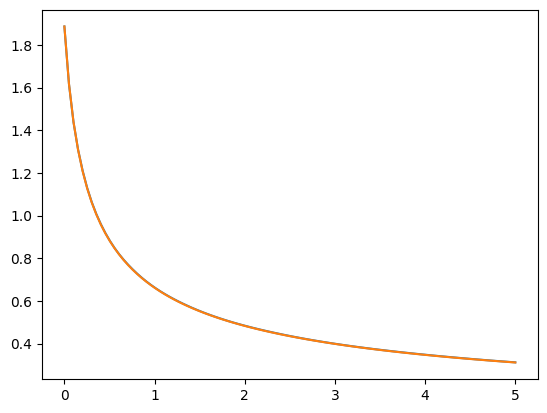

In [35]:
plt.plot(sol.ts[0].cpu(), sol.ys[0].cpu())
plt.plot(sol_scipy.t, sol_scipy.y[0])
plt.show()